<center>


<img src="https://habrastorage.org/webt/jq/gc/r5/jqgcr5azmatev6zvgufn8xftehy.png">
    
#  **II Escuela de Verano en Física Computacional**
Autor: [José Fernando Tobías Buelvas.](https://github.com/jftobias/pcp-ejercicios)\
Institución: Universidad del Atlántico (Colombia).\
Correo: jftobiasb@gmail.com

    

# <center> Lista de Ejercicios




### Problema 1:  Raíces de ecuaciones



La siguiente fórmula nos describe la velocidad ascendente v de un cohete:

$$v(t)=uln\left(\frac{m}{m-qt}\right)-gt$$

Donde:

* u = módulo de la velocidad del combustible expulsado en relación con el cohete

* m = masa inicial del cohete (en t=0)

* g = módulo aceleración de la gravedad

* t = tiempo


Dado:

$$u= 950m/s,\quad m=2x10^5 kg, \quad q=3x10^3 kg/s, \quad g=9.8m/s^2, \quad t \in [10,25]$$

a) Defina y utilice 3 métodos para hallar el tiempo que tarda el cohete en alcanzar la velocidad de 500 m/s.

b) Resuelva analíticamente y compare resultados con los 3 métodos utilizados.

c) Elabore gráficas y detalle su análisis.

In [1]:
# Importamos las librerías 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Definimos los métodos para calcular las raíces.

# Método de bisección

def biseccion(f, a, b, tol):
    
    if a > b:
        raise ValueError("Intervalo mal definido.")
    if tol <= 0:
        raise ValueError("La cota de error debe ser un número positivo.")
        
    x = (a + b)*0.5 
    i=1
    while True:
        if b - a < tol:
            i+=1
            return(x,i)
        # Utilizamos la función signo para evitar errores de precisión
        elif np.sign(f(a)) * np.sign(f(x)) > 0: #+*- o +*+
            i+=1 #para el contador
            a = x
        else:
            i+=1
            b = x
        x = (a + b) / 2.0
    return(x,i)

# Método de Newton
# Este método necesita una derivada.
def derivative(f,x,h): # defino la derivada de una función a un paso adelante
    return (f(x+h)-f(x))/h
def NR(f, x0, h): # defino un solucionador de raíces por método de Newton-Raphson
    Xn = x0
    Xns = Xn + 10 * h 
    i = 1
    while (abs(Xn - Xns) > h): 
        Y = f(Xns)                    
        Xn = Xns
        Xns = Xns - Y / derivative(f, Xn, h)  
        i += 1
    return Xns, i

# Método de la secante
def secant(f, x0, x1, eps):
    import sys
    global x
    f_x0 = f(x0)
    f_x1 = f(x1)
    iteration_counter = 0
    while abs(f_x1) > eps and iteration_counter < 50:
        try:
            denominator = float(f_x1 - f_x0)/(x1 - x0)
            x = x1 - float(f_x1)/denominator
        except ZeroDivisionError:
            print("Error! - 0 en el denominador para t = ", x)
            sys.exit(1)     # Abort with error
        x0 = x1
        x1 = x
        f_x0 = f_x1
        f_x1 = f(x1)
        iteration_counter += 1
    # Here, either a solution is found, or too many iterations
    if abs(f_x1) > eps:
        iteration_counter = -1
    return x, iteration_counter

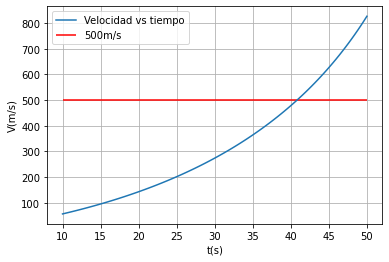

In [3]:
t = np.linspace(10,50,100) # 100 valores en el intervalo de [10,25]s

# Definimos la función y la derivada
u = 950
m = 2e5
q = 3e3
g = 9.8
def v(t):
    vel = u*np.log(m/(m - q*t)) - g*t
    return vel

vel = v(t)
plt.plot(t,vel,label='Velocidad vs tiempo')
plt.hlines(500,10,50,'r',label='500m/s')
#plt.vlines(500,10,50,'r',label='500m/s')
plt.xlabel('t(s)')
plt.ylabel('V(m/s)')
plt.legend()
plt.grid()
plt.show()



Al observar la gráfica anterior, vemos en en el intervalo de $t\in[10,25]s$ el cohete no alcanza la rapidez de $500m/s$. Luego, buscamos el tiempo en un intervalo más grande.

In [4]:
# función auxiliar a evaluar
def v_aux(t):
    vel = u*np.log(m/(m - q*t)) - g*t - 500
    return vel

tol = 1e-8

bisec = biseccion(v_aux,30,50,tol)
print(bisec)

(40.81587186548859, 33)


In [5]:
# Newton-Raphson
x_0 = 20
nr = NR(v_aux,x_0,tol)
print (nr)

(40.81587186850038, 8)


In [6]:
# Método de la secante
sec = secant(v_aux,30,50,tol)
print(sec)

(40.815871868518336, 6)


Analíticamente, la solución a esta ecuación es la siguiente:
$$t = \frac{u}{g}\left[W\left( -\frac{mg}{qu}e^{-\frac{500}{u}-\frac{mg}{qu}}\right) + \frac{mg}{qu}\right]$$
donde $W(z)$ es la función de Lambert, la cual tiene la propiedad $$z=W(z)e^{W(z)}$$
Usaremos la librería scipy.special.lambertw.

In [7]:
from scipy.special import lambertw

c = m*g/(q*u)
w = lambertw(-c*np.exp(-(500/u) - c))
t_500 = (w + c)*u/g 
t_500 = t_500.real
print(t_500)


40.81587186850039


Ahora, veamos los errores de los métodos.
Tomando como referencia el resultado anterior, calculemos el error absoluto de cada uno de los métodos:
$$Error = |Valor_{real} - Valor_{Método}|$$

In [8]:
error_biseccion = np.abs(bisec[0] - t_500)
error_Newton = np.abs(nr[0] - t_500)
error_secante = np.abs(sec[0] - t_500)

print('Los errores absolutos de los métodos son:')
print('')
print('Bisección: ',error_biseccion)
print('Newton-Raphson: ',error_Newton)
print('Secante: ',error_secante)

Los errores absolutos de los métodos son:

Bisección:  3.0117988103484095e-09
Newton-Raphson:  7.105427357601002e-15
Secante:  1.794830950530013e-11


### Problema 1(actualizado): Raíces de ecuaciones

<p align="center">
  <img src="https://habrastorage.org/webt/x6/5e/j3/x65ej3pwjn51joueohr3gckbfyy.png"  width=50% />
</p>

Considere la ecuación de movimiento de Kepler:

$$M=E-e sen(E)$$
 
Donde:

* $M$: anomalía media.
* $E$: anomalía excéntrica de una órbita elíptica .
* $e$: Excentricidad. 

Para encontrar $E$, necesitamos resolver la ecuación no lineal:

$$f(E) = M + e sen E − E = 0$$

Dado $e = 0.0167$ (excentricidad de la Tierra), $a=1$UA (Distancia de la tierra al sol) y $M = 1$ (en radianes)

**a)** Defina y utilice 3 métodos para calcular $E$ elegir aproximaciones iniciales apropiadas o un intervalo que contenga la raíz (requerido para el método de bisección), grafique la función $f (E)$ y luego determine gráficamente dónde cruza el eje $E$.

**b)** Calcule E, (haciendo $f(E)=0$ para distintos valores de $M$) , donde $t_0=0, t=100$ días (P es constante), elija esos valores de $E$, grafique $E(t), x(t), y(t), y(x)$, detalle su análisis.

Sabiendo que:

$$x=a.cos(E-e)$$

$$y=a\sqrt{1-e^2}sen(E)$$

$$M=\frac{2\pi (t-t_0)}{P}$$

donde:

t: tiempo en días

P: Periodo

Conocemos de la **tercera ley de Kepler**:

$$P=\frac{2\pi a^{3/2}}{(G(M_\star+m))^{1/2}}$$

$a,G,M_\star,m$ son la distancia de la tierra al sol, la constante de gravitación universal, la masa del sol y la masa de la tierra


### $\underline{Solución}$:
Como ya se han definido los métodos para cálculo de raíces. Graficaremos la función y luego definimos la función para encontrar el valor de $E$.

In [9]:
m_s = 1.989e30   # masa del sol en kg
G = 6.67e-11 # constante de gravitación universal
m_t = 5.972e24   # masa de la tierra
a = 1.496e11     # unidad astronómicas expresada en metros
e = 0.0167       # excentricidad
M = 1            # anomalía media en radianes

# definimos la función para evaluar
def f(E):
    f = M + e * np.sin(E) - E
    return f

In [10]:
b1 = biseccion(f, 0,2, tol)
nr1 = NR(f, 1, tol)
s1 = secant(f, 0,2, tol)

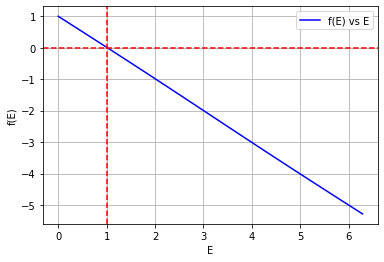

In [11]:
E = np.linspace(0, 2*np.pi, 100)
y = f(E)
plt.plot(E, y,'b-', label='f(E) vs E')
plt.grid()
plt.axhline(0, c='r', ls='--')
plt.axvline(s1[0], c='r', ls='--')
plt.xlabel('E')
plt.ylabel('f(E)')
plt.legend()
plt.show()

#### Inciso b)

In [12]:
numP = 2 * np.pi * a**(1.5)
denP = np.sqrt(G*(m_s + m_t))
P = numP/denP
def Mt(t):
    m = 2*np.pi *t/P
    return m
dia = 86400# segundos
t = dia * np.linspace(0, 100, 101)
M_list = Mt(t)

In [13]:
P/dia

365.3276604484075

In [14]:
E = []
x = []
y = []
for i in M_list:
    M = i
    nr2 = NR(f, 1,tol)[0]
    E.append(nr2)
    x.append( a*np.cos(nr2 - e))  
    y.append( a*np.sqrt(1 - e**2) * np.sin(nr2))
E = np.array(E)
x = np.array(x)
y = np.array(y)

# Para un año completo

t_año = 365.33 * np.linspace(0, 86400, 101)
M_año = Mt(t_año)
x2 = []
y2 = []
for i in M_año:
    M = i
    nr = NR(f, 1,tol)[0]
    x2.append( a*np.cos(nr - e))  
    y2.append( a*np.sqrt(1 - e**2) * np.sin(nr))
x2 = np.array(x2)
y2 = np.array(y2)



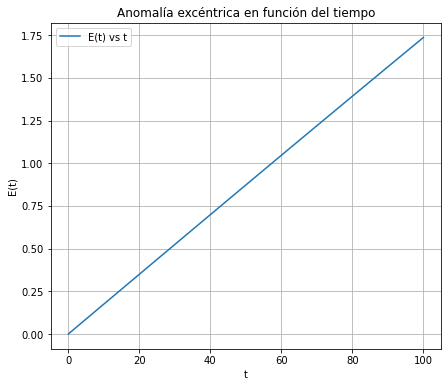

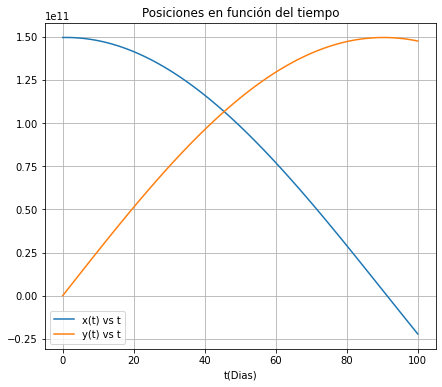

In [15]:
t2 = np.linspace(0,100,101)

plt.rcParams["figure.figsize"] = (7,6)

plt.plot(t2, E, label='E(t) vs t')
plt.title('Anomalía excéntrica en función del tiempo')
plt.grid()
plt.xlabel('t')
plt.ylabel('E(t)')
plt.legend()
plt.show()
#
plt.title('Posiciones en función del tiempo')
plt.plot(t2, x, label='x(t) vs t')
plt.plot(t2, y, label='y(t) vs t')
plt.grid()
plt.xlabel('t(Dias)')
plt.legend()
plt.show()

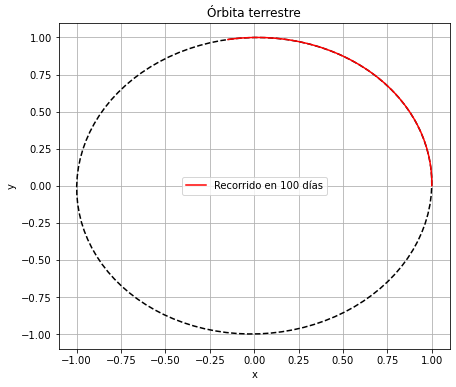

In [16]:
# Miremos la trayectoria
plt.rcParams["figure.figsize"] = (7,6)
plt.plot(x2/a,y2/a,'k--')  
plt.title('Órbita terrestre')
plt.plot(x/a, y/a,'r', label='Recorrido en 100 días')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Problema 2: Interpolación

Dadas las funciones:

1. $f (x) = sin(x^2) $

2. $f (x) = e^{sin (x)}$

3. $f (x) = \frac{0.2}{(x-3.2)^2 + 0.04}$

a) Estudiar el error en dos métodos de interpolación (de su elección) con 10,20 y 50 datos (uniformemente distribuidos) en el intervalo [0.0, 5.0] y compare los resultados.

b) Añade una perturbación sinusoidal ($\delta g(x)=sin(x)$) del orden de $10^{-4},10^{-5}, 10^{-6}$ con distribución homogénea, grafice y detalle su análisis, ¿cuál es el error que generan con respecto a aproximación hecha en "2.a)"? (graficar el error absoluto vs x).

c) Graficar el error absoluto entre las aproximaciones original y la perturbada, con el eje x (número de pasos) en potencias de 2 y detallar su análisis.

In [17]:
# Definamos las funciones que vamos a evaluar:

def f(x):
    f = np.sin(x**2)
    return f
def g(x):
    g = np.exp(np.sin(x))
    return g
def h(x):
    n = (x - 3.2)**2 + 0.04
    return 0.2/n

# Establecemos los datos en el intervalo dado

x1 = np.linspace(0,5,10)
x2 = np.linspace(0,5,20)
x3 = np.linspace(0,5,50)

f1, f2, f3 = f(x1), f(x2), f(x3)
g1, g2, g3 = g(x1), g(x2), g(x3)
h1, h2, h3 = h(x1), h(x2), h(x3)

funciones = [[f1, f2, f3], [g1, g2, g3], [h1, h2, h3]] # matriz de funciones

In [18]:
# Definamos interpolación de Lagrange
def L_interp(x,yi,xi):
    n = len(xi)
    L = 0
    for i in range(n):
        P = 1
        for j in range(n):
            if (i == j):
                P *= 1
            else:
                P *=  (x - xi[j])/(xi[i] - xi[j])
        L += yi[i] * P
    return L

In [19]:
xm = np.linspace(0,5,100) # Muestras para la función polinomio de Lagrange
# Evaluamos el polinomio de Lagrange para la función y = sen(x²)
L_f1 = L_interp(xm,f1,x1) 
L_f2 = L_interp(xm,f2,x2)
L_f3 = L_interp(xm,f3,x3)

# Evaluamos el polinomio de Lagrange para la función y = exp(sen(x))
L_g1 = L_interp(xm,g1,x1) 
L_g2 = L_interp(xm,g2,x2)
L_g3 = L_interp(xm,g3,x3)

# Evaluamos el polinomio de Lagrange para la función y = 0.2/((x-3.2)² + 0.04)
L_h1 = L_interp(xm,h1,x1) 
L_h2 = L_interp(xm,h2,x2)
L_h3 = L_interp(xm,h3,x3)


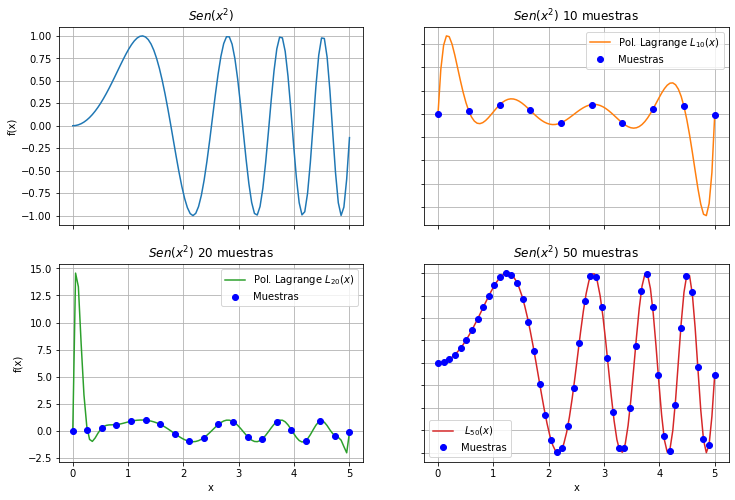

In [20]:
yf = f(xm)

plt.rcParams["figure.figsize"] = (12,8)
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(xm, yf)
axs[0, 0].grid()
axs[0, 0].set_title('$Sen(x^2)$')

axs[0, 1].plot(xm, L_f1, 'tab:orange', label='Pol. Lagrange $L_{10}(x)$')
axs[0, 1].plot(x1, f1, 'bo', label='Muestras')
axs[0, 1].grid()
axs[0, 1].legend()
axs[0, 1].set_title('$Sen(x^2)$ 10 muestras')

axs[1, 0].plot(xm, L_f2, 'tab:green', label='Pol. Lagrange $L_{20}(x)$')
axs[1, 0].plot(x2, f2, 'bo', label='Muestras')
axs[1, 0].grid()
axs[1, 0].legend()
axs[1, 0].set_title('$Sen(x^2)$ 20 muestras')

axs[1, 1].plot(xm, L_f3, 'tab:red', label=' $L_{50}(x)$')
axs[1, 1].plot(x3, f3, 'bo', label='Muestras')
axs[1, 1].grid()
axs[1, 1].legend()
axs[1, 1].set_title('$Sen(x^2)$ 50 muestras')

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='f(x)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

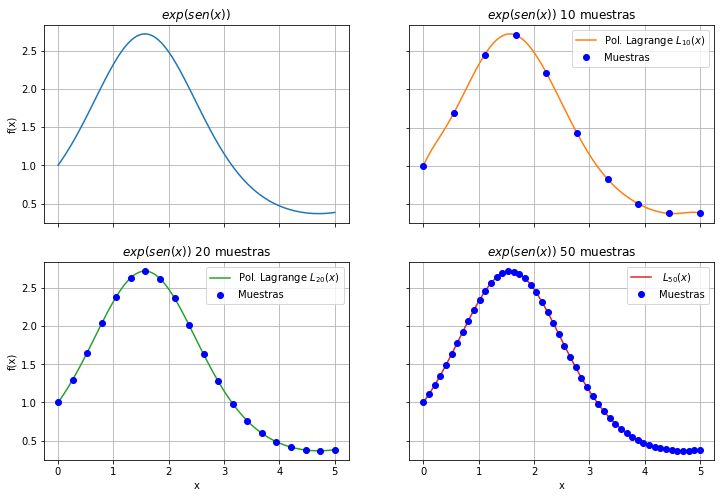

In [21]:
yg = g(xm)

plt.rcParams["figure.figsize"] = (12,8)
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(xm, yg)
axs[0, 0].grid()
axs[0, 0].set_title('$exp(sen(x))$')

axs[0, 1].plot(xm, L_g1, 'tab:orange', label='Pol. Lagrange $L_{10}(x)$')
axs[0, 1].plot(x1, g1, 'bo', label='Muestras')
axs[0, 1].grid()
axs[0, 1].legend()
axs[0, 1].set_title('$exp(sen(x))$ 10 muestras')

axs[1, 0].plot(xm, L_g2, 'tab:green', label='Pol. Lagrange $L_{20}(x)$')
axs[1, 0].plot(x2, g2, 'bo', label='Muestras')
axs[1, 0].grid()
axs[1, 0].legend()
axs[1, 0].set_title('$exp(sen(x))$ 20 muestras')

axs[1, 1].plot(xm, L_g3, 'tab:red', label=' $L_{50}(x)$')
axs[1, 1].plot(x3, g3, 'bo', label='Muestras')
axs[1, 1].grid()
axs[1, 1].legend()
axs[1, 1].set_title('$exp(sen(x))$ 50 muestras')

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='f(x)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

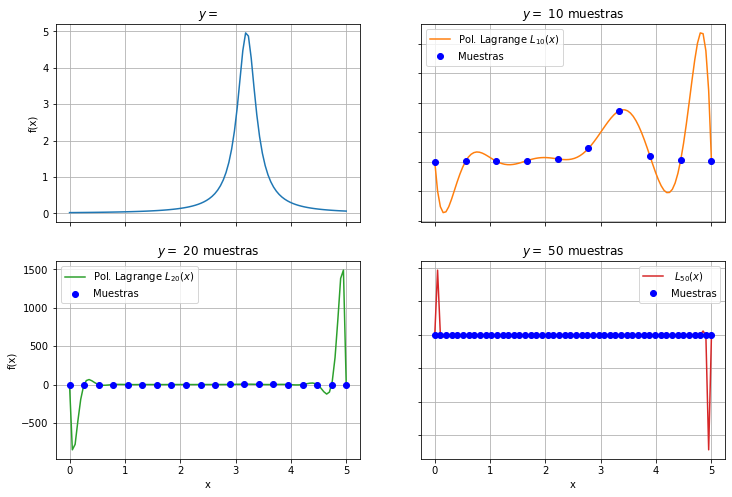

In [22]:
yh = h(xm)

plt.rcParams["figure.figsize"] = (12,8)
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(xm, yh)
axs[0, 0].grid()
axs[0, 0].set_title('$y = \frac{0.2}{(x-2)^2-0.04}$')

axs[0, 1].plot(xm, L_h1, 'tab:orange', label='Pol. Lagrange $L_{10}(x)$')
axs[0, 1].plot(x1, h1, 'bo', label='Muestras')
axs[0, 1].grid()
axs[0, 1].legend()
axs[0, 1].set_title('$y = \frac{0.2}{(x-2)^2-0.04}$ 10 muestras')

axs[1, 0].plot(xm, L_h2, 'tab:green', label='Pol. Lagrange $L_{20}(x)$')
axs[1, 0].plot(x2, h2, 'bo', label='Muestras')
axs[1, 0].grid()
axs[1, 0].legend()
axs[1, 0].set_title('$y = \frac{0.2}{(x-2)^2-0.04}$ 20 muestras')

axs[1, 1].plot(xm, L_h3, 'tab:red', label=' $L_{50}(x)$')
axs[1, 1].plot(x3, h3, 'bo', label='Muestras')
axs[1, 1].grid()
axs[1, 1].legend()
axs[1, 1].set_title('$y = \frac{0.2}{(x-2)^2-0.04}$ 50 muestras')

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='f(x)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [23]:
# Definamos la interpolación polinómica de Newton

def dif_div(x, y):
    n = len(y)
    a = np.zeros([n, n])
    a[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            a[i][j] = (a[i+1][j-1] - a[i][j-1]) / (x[i+j]-x[i])
    return a

def N_pol(x, xi, ai):
    n = len(xi) - 1 
    P = ai[n]
    for i in range(1,n+1):
        P = ai[n-i] + P * (x - xi[n-i])
    return P

In [24]:
# Primera función
af1 = dif_div(x1, f1)[0,:]
N_f1 = N_pol(xm, x1, af1)
af2 = dif_div(x2, f2)[0,:]
N_f2 = N_pol(xm, x2, af2)
af3 = dif_div(x3, f3)[0,:]
N_f3 = N_pol(xm, x3, af3)

# Segunda función
ag1 = dif_div(x1, g1)[0,:]
N_g1 = N_pol(xm, x1, ag1)
ag2 = dif_div(x2, g2)[0,:]
N_g2 = N_pol(xm, x2, ag2)
ag3 = dif_div(x3, g3)[0,:]
N_g3 = N_pol(xm, x3, ag3)

# Tercera función
ah1 = dif_div(x1, h1)[0,:]
N_h1 = N_pol(xm, x1, ah1)
ah2 = dif_div(x2, h2)[0,:]
N_h2 = N_pol(xm, x2, ah2)
ah3 = dif_div(x3, h3)[0,:]
N_h3 = N_pol(xm, x3, ah3)

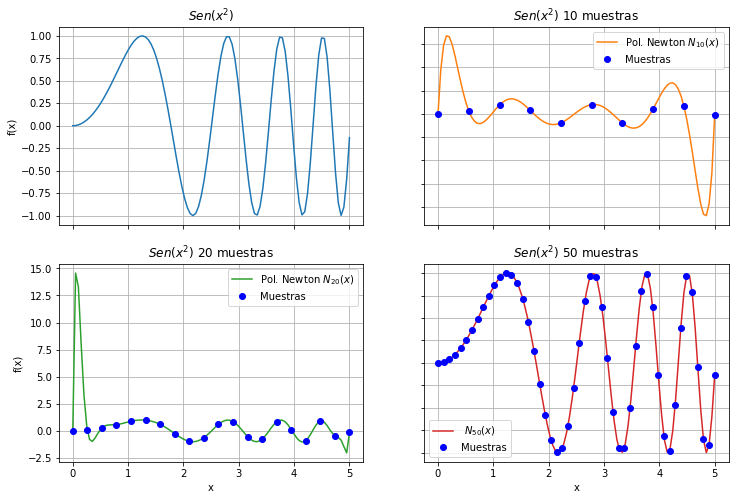

In [25]:
yf = f(xm)

plt.rcParams["figure.figsize"] = (12,8)
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(xm, yf)
axs[0, 0].grid()
axs[0, 0].set_title('$Sen(x^2)$')

axs[0, 1].plot(xm, N_f1, 'tab:orange', label='Pol. Newton $N_{10}(x)$')
axs[0, 1].plot(x1, f1, 'bo', label='Muestras')
axs[0, 1].grid()
axs[0, 1].legend()
axs[0, 1].set_title('$Sen(x^2)$ 10 muestras')

axs[1, 0].plot(xm, N_f2, 'tab:green', label='Pol. Newton $N_{20}(x)$')
axs[1, 0].plot(x2, f2, 'bo', label='Muestras')
axs[1, 0].grid()
axs[1, 0].legend()
axs[1, 0].set_title('$Sen(x^2)$ 20 muestras')

axs[1, 1].plot(xm, N_f3, 'tab:red', label=' $N_{50}(x)$')
axs[1, 1].plot(x3, f3, 'bo', label='Muestras')
axs[1, 1].grid()
axs[1, 1].legend()
axs[1, 1].set_title('$Sen(x^2)$ 50 muestras')

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='f(x)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

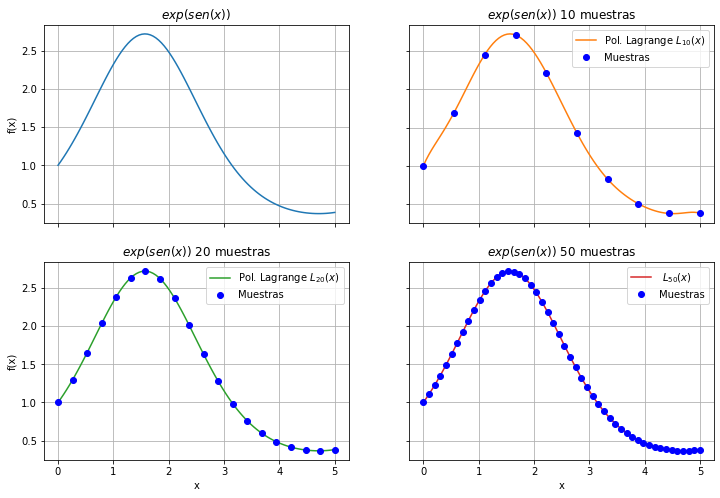

In [26]:
yg = g(xm)

plt.rcParams["figure.figsize"] = (12,8)
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(xm, yg)
axs[0, 0].grid()
axs[0, 0].set_title('$exp(sen(x))$')

axs[0, 1].plot(xm, N_g1, 'tab:orange', label='Pol. Lagrange $L_{10}(x)$')
axs[0, 1].plot(x1, g1, 'bo', label='Muestras')
axs[0, 1].grid()
axs[0, 1].legend()
axs[0, 1].set_title('$exp(sen(x))$ 10 muestras')

axs[1, 0].plot(xm, N_g2, 'tab:green', label='Pol. Lagrange $L_{20}(x)$')
axs[1, 0].plot(x2, g2, 'bo', label='Muestras')
axs[1, 0].grid()
axs[1, 0].legend()
axs[1, 0].set_title('$exp(sen(x))$ 20 muestras')

axs[1, 1].plot(xm, N_g3, 'tab:red', label=' $L_{50}(x)$')
axs[1, 1].plot(x3, g3, 'bo', label='Muestras')
axs[1, 1].grid()
axs[1, 1].legend()
axs[1, 1].set_title('$exp(sen(x))$ 50 muestras')

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='f(x)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

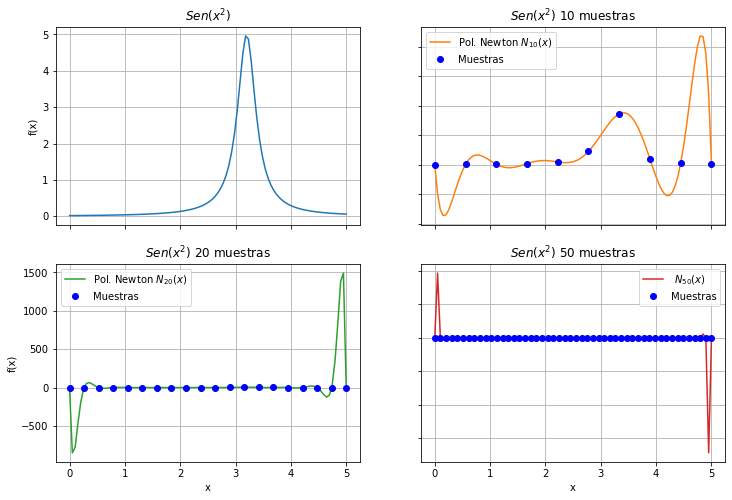

In [27]:
yf = h(xm)

plt.rcParams["figure.figsize"] = (12,8)
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(xm, yf)
axs[0, 0].grid()
axs[0, 0].set_title('$Sen(x^2)$')

axs[0, 1].plot(xm, N_h1, 'tab:orange', label='Pol. Newton $N_{10}(x)$')
axs[0, 1].plot(x1, h1, 'bo', label='Muestras')
axs[0, 1].grid()
axs[0, 1].legend()
axs[0, 1].set_title('$Sen(x^2)$ 10 muestras')

axs[1, 0].plot(xm, N_h2, 'tab:green', label='Pol. Newton $N_{20}(x)$')
axs[1, 0].plot(x2, h2, 'bo', label='Muestras')
axs[1, 0].grid()
axs[1, 0].legend()
axs[1, 0].set_title('$Sen(x^2)$ 20 muestras')

axs[1, 1].plot(xm, N_h3, 'tab:red', label=' $N_{50}(x)$')
axs[1, 1].plot(x3, h3, 'bo', label='Muestras')
axs[1, 1].grid()
axs[1, 1].legend()
axs[1, 1].set_title('$Sen(x^2)$ 50 muestras')

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='f(x)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

### Problema 3: Derivación numérica

En 1928, George Gamow propuso una teoría muy exitosa del decaímiento $\alpha$, según la cual la partícula $α$ se mueve libremente dentro del núcleo y se emite después de atravesar la barrera potencial entre ella y el núcleo hijo. En otras palabras, la partícula $α$, de carga $Z_2$, cuya energía es $E$, está atrapada en un pozo potencial de radio R por la barrera potencial:

$$V(r)=\frac{Z_1Z_2e^2}{4\pi\epsilon_0 r}$$

para $r>R$.

$Z_1 =Z-2, \quad Z_2=2$, donde Z es la carga del núcleo de radio R.

$r$: es el radio fuera del núcleo ($r>R$ y con A, número de masa) donde:

$$R = 1.5\times 10^{-15}\,A^{1/3}\,{\rm m}=2.0\times 10^{-15}\,Z_1^{\,1/3}\,{\rm m}$$

a) Calcule la fuerza que experimenta la partícula y analice $\alpha$ para $r\in [R,3R]$, utilizando los tres esquemas de diferencias finitas.

b) Comparar los esquemas con la solución analítica, calcular los errores, órdenes de convergencia y detallar su análisis.

$\underline{Solución:}$ \


In [28]:
# Definamos la función V(r)
Z = 50
Z1 = Z - 2
Z2 = 2
R = 2e-15 * Z1**(1/3)
e = 1.6021e-19          # Carga del electrón (C)
ke = 9e9           # Constante eléctrica (N*m²/C²)

def V(r):
    m = ke * Z1 * Z2 * e**2
    return m/r


In [29]:
# Definimos la función derivada con los tres métodos
def derivative(f,a,method='centrada',h=1e-3):
    if method == 'centrada':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'adelante':
        return (f(a + h) - f(a))/h
    elif method == 'atras':
        return (f(a) - f(a - h))/h 
    else:
        raise ValueError("Los métodos pueden ser 'centrada', 'adelante' o 'atras'.")

In [30]:
r = np.linspace(R, 3*R, 100) 
# las derivadas con cada método
dv_c = derivative(V, r, method='centrada',h=1e-15)
dv_l = derivative(V, r, method='atras',h=1e-15)
dv_r = derivative(V, r, method='adelante',h=1e-15)

# La partícula alfa tiene una carga de 2e
# F = qE = q dV/dr
F_c = -dv_c
F_l = -dv_l
F_r = -dv_r

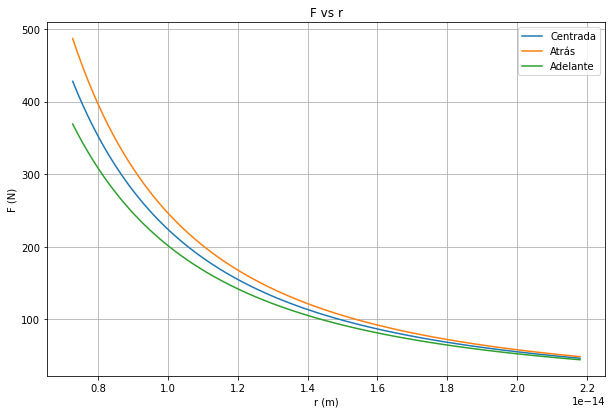

In [31]:
# Grafiquemos ahora la F vs r
plt.rcParams["figure.figsize"] = (10,6.5)

plt.plot(r, F_c, label='Centrada')
plt.plot(r, F_l, label='Atrás')
plt.plot(r, F_r, label='Adelante')
plt.title('F vs r')
plt.xlabel('r (m)')
plt.ylabel('F (N)')
plt.grid()
plt.legend()
plt.show()


Analíticamente, tenemos que la fuerza eléctrica puede obtenerse a partir del potencial eléctrico de la siguiente forma:
$$\vec{F} = - \vec{\nabla(V)} = \frac{\partial V}{\partial r} \hat{r}$$
Lo que nos lleva a:

$$\vec{F} = \frac{Z_1 Z_2 e^2}{4\pi\epsilon_0 r^2} \hat{r}$$

In [32]:
#Definimos la función fuerza
def F(r):
    num = ke*Z1*Z2*e**2
    return num/r**2

fuerza = F(r)

# Veamos los errores absolutos:

error_centrada = fuerza - F_c
error_atras = fuerza - F_l
error_adelante = fuerza - F_r

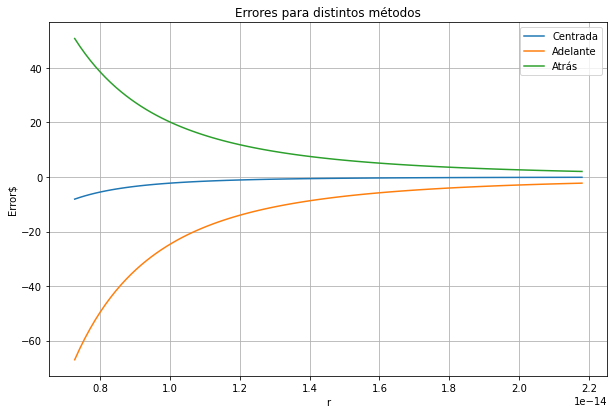

In [33]:
plt.plot(r,error_centrada) 
plt.plot(r,error_atras)
plt.plot(r,error_adelante)
plt.legend(['Centrada','Adelante','Atrás'])
plt.title('Errores para distintos métodos')
plt.ylabel('Error$')
plt.xlabel('r')
plt.grid()
plt.show()

### Problema 4: Integración numérica

La carga a partir de la densidad radial de carga superficial, $\sigma(r)$, sobre el área de la sección transversal del cilindro, está definida por:

$$q_{total}=\int_A \sigma(r)dA(r)$$

donde, dA es el diferencial de área de la base del cilindro:

$$q_{total}=\int_A \sigma(r)(2\pi r dr)$$

Sabemos que la densidad tiene la forma:

$$\sigma(r)=\sigma_0 \left(1-\frac{r^2}{a^2} \right)$$

donde $\sigma_0 = 1.3\times 10^{-1}C/m^2$,  $a = 1\times 10^{-3}m$\
Y el campo eléctrico:

$$\vec{E}=\frac{kq_{total}}{d^2}\hat r$$

d: distancia de la superficie al espacio a evaluar el campo eléctrico. ($d\gt r$)


a) Determina la distribución de la carga y campo eléctrico (a distancias $d \in \{ r+r/4,r+r/2\}$ ) en función al radio utilizando 3 métodos de integración.

b) Obtener la solución analítica, comparar los errores de distintos métodos y detallar análisis.


In [34]:
# Método del punto medio
def mp(f, a, b, n):
    h = (b - a)/float(n)
    suma = 0
    for i in range(int(n)):
        suma += f(a + 0.5*h + i * h) # tomando el punto medio de cada intervalo
    return suma * h

# Método del trapecio
def trap(f, a, b, n):
    h = (b-a) / float(n)
    intgr = 0.5 * h * (f(a) + f(b))
    for i in range(1, int(n)):
        intgr += h * f(i * h) 
    return intgr

# Método de Simpson
def simpson(f, a, b, n):
    h = (b - a) / float(n)
    suma = 0.0
    for i in range(1, int(n)):
        x = a + i * h
        if(i % 2 == 0): 
            suma += 2 * f(x)
        else:
            suma += 4 * f(x)
    suma = suma + f(a) + f(b)
    res = suma * (h / 3)
    return res

In [35]:
# Definamos los datos del problema
sigma_0 = 1.3e-6
a = 1e-3
def sigma(r):
    sigma = sigma_0 * (1 - (r/a)**2)
    return sigma

# definamos una función auxilar para calcular la carga total
def f(r):
    f = r * sigma(r)
    return f

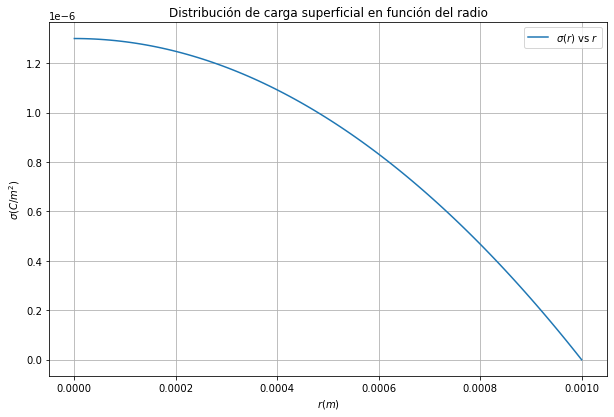

In [36]:
# calculemos q por diferentes métodos
q_mp = mp(f,0, a, 1e3)
q_trap = trap(f, 0, a, 1e3)
q_simp = simpson(f, 0, a, 1e3)

r = np.linspace(0, a, 100)
sig = sigma(r)

plt.plot(r,sig, label='$\sigma(r)$ vs $r$')
plt.grid()
plt.xlabel('$r (m)$')
plt.ylabel('$\sigma(C/m^2)$')
plt.title('Distribución de carga superficial en función del radio')
plt.legend()

In [37]:
# Veamos ahora el campo eléctrico

d = np.linspace(a + a/4, a + a/2, 100)

In [38]:
d.shape

(100,)

### Problema 5:

Considerar un aro horizontal sin rozamiento de radio R. En este aro enhebro tres objetos con masas idénticas m, y, entre los objetos, tres muelles idénticos, cada uno con una masa constante de fuerza k.

<p align="center">
  <img src="https://habrastorage.org/webt/nz/qz/g4/nzqzg42gjarvpx3yk-fy0qgn20k.png"  width=55% />
</p>



Sabemos que, la energía cinética es:

$$T=\frac{1}{2}mR^2(\dot{\phi_1^2}+\dot{\phi_2^2}+\dot{\phi_3^2})$$

y la energía potencial:

$$U=\frac{1}{2}kR^2 [(\phi_1-\phi_2)^2+(\phi_2-\phi_3)^2+(\phi_3-\phi_1)^2]$$

Resultado: Sistema de EDOs 

$$m\frac{d^2\phi_1}{dt^2}=-k(\phi_1-\phi_2)-k(\phi_1-\phi_3)$$

$$m\frac{d^2\phi_2}{dt^2}=-k(\phi_2-\phi_3)-k(\phi_2-\phi_1)$$

$$m\frac{d^2\phi_3}{dt^2}=-k(\phi_3-\phi_1)-k(\phi_3-\phi_2)$$


a) Encontrar las ecuaciones de movimiento para cada masa usando las ecuaciones de Euler-Lagrange. *(ejemplo en PCP_sesión5.ipynb)*

b) Resolver numéricamente el sistema de ecuaciones con los métodos de Euler y RK de orden 4. Para los datos: $\phi_1=\phi_2/2,\quad \phi_2=\phi_3/2,\quad \phi_3=\pi/10 \quad $ y $\quad \phi_1'=1,\quad \phi_2'=1,\quad \phi_3'=1, \quad R=m=k=1$

c) Mostrar los resultados y explicar la dinámica del sistema en base al resultado de la simulación.

In [46]:
# Importamos librería sympy para solución analítica
import sympy as sym
L, T, U, R, k, m, t = sym.symbols('L, T, U, R, k, m, t')

phi1, phi2, phi3 = sym.Function('\phi_1, \phi_2, \phi_3')

T = sym.Rational(1,2)*m*R**2*(phi(t).diff(t))

TypeError: cannot unpack non-iterable UndefinedFunction object

In [40]:
# Introduce tu respuesta aquí

**Por último, debe de rellenar la siguiente encuesta de satisfacción:** https://forms.gle/4WU3ovvP7gJMj8GA7 (ingresar con el correo que se inscribió).

Enviar sus respuestas a nuestro correo: pythonclubforphysicists@gmail.com

**OJO: El correo debe de tener como asunto:**
**"Ejercicios_IIEVFC"**

*Caso contrario su solución puede quedar sin evaluar debido a la gran cantidad de correos.*